<a href="https://colab.research.google.com/github/Tenntucky/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/Kole_Goldsberry_Assignment_regression_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [5]:
df.head()

bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
0        1.5         3  ...                 0                    0
1        1.0         2  ...                 0                    0
2        1.0         1  ...                 0                    0
3        1.0         1  ...                 0                    0
4        1.0         4  ...                 0                    0

[5 rows x 34 columns]

In [0]:
ma = df[df['display_address'] == 'Metropolitan Avenue']

For the first filter I wanted to look at a certain location I was told to be affordable but not too dangerous. Therefor, I took Metropolitan Avenue. 

In [15]:
pd.options.display.float_format = '{:,.0f}'.format
df['price'].describe()

count   48,818
mean     3,580
std      1,762
min      1,375
25%      2,500
50%      3,150
75%      4,095
max     15,500
Name: price, dtype: float64

In [16]:
mean_baseline = df['price'].mean()
error = mean_baseline - df['price']
mean_absolute_error = error.abs().mean()
print(f'If we just guessed every Metroplolitan Avenue apartment rented for ${mean_baseline:,.0f},')
print(f'we would be off by ${mean_absolute_error:,.0f} on average.')

If we just guessed every Metroplolitan Avenue apartment rented for $3,580,
we would be off by $1,202 on average.


In [20]:
import plotly.express as px
px.scatter(df, x='bathrooms', y='price', trendline='ols')

In [19]:
px.scatter(df, x='bedrooms', y='price', trendline='ols')

In [26]:
px.scatter(df, x='latitude', y='longitude')

In [21]:
df.price.mean()

3579.5609816051456

In [22]:
df.price.std()

1762.42087543672

In [23]:
df.price.describe()

count   48,818
mean     3,580
std      1,762
min      1,375
25%      2,500
50%      3,150
75%      4,095
max     15,500
Name: price, dtype: float64

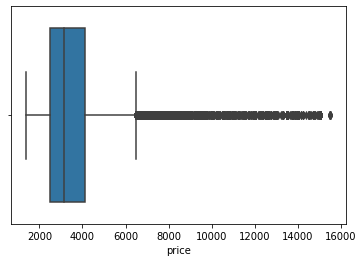

In [24]:
import seaborn as sns

sns.boxplot(df.price)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model = LinearRegression()

In [29]:
features = ['bedrooms']
target = 'price'
X = df[features]
y = df[target]

print(X.shape, y.shape)

(48818, 1) (48818,)


In [30]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
bedroom = 2
X_test = [[bedroom]]
y_pred = model.predict(X_test)

print(f'Predicted price for {bedroom} bedroom is: {y_pred[0]}')

Predicted price for 2 bedroom is: 3974.482484232912


In [52]:
import numpy as np
y_df = df[df['bedrooms'] == 2]
y_test = y_df['price'].mean()
y_test = [y_test]
print(y_test)

[3779.5006863417984]


In [53]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Our models error: {mae}')

Our models error: 194.98179789111373


In [54]:
def predict(bedroom):
  y_pred = model.predict([[bedroom]])
  estimate = y_pred[0]
  coefficient = model.coef_[0]
  result = f'${estimate:,.0f} estimated price for {bedroom:,.0f} bedroom apartment in New York.'
  explanation = f'In this linear regression, each addtional bedroom adds ${coefficient:,.0f}.'
  return result, explanation

predict(2)

('$3,974 estimated price for 2 bedroom apartment in New York.',
 'In this linear regression, each addtional bedroom adds $853.')

In [55]:
predict(5)

('$6,534 estimated price for 5 bedroom apartment in New York.',
 'In this linear regression, each addtional bedroom adds $853.')